In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns


In [19]:
# Set the start and end dates for the data
start_date = dt.datetime(2018, 1, 1)
end_date = dt.datetime(2023,6,1)

# Retrieve ETH data
eth_data = yf.download('ETH-USD', start=start_date, end=end_date)


[*********************100%***********************]  1 of 1 completed


In [20]:
eth_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-27,1828.575684,1836.184570,1817.492065,1831.118286,1831.118286,3216737652
2023-05-28,1831.098633,1915.723267,1825.467285,1910.914185,1910.914185,6359610561
2023-05-29,1909.297485,1926.421753,1879.077515,1893.078125,1893.078125,5884674572
2023-05-30,1893.093140,1916.574951,1883.934692,1901.026611,1901.026611,5363439784
2023-05-31,1901.098267,1907.035400,1852.094727,1874.130493,1874.130493,5984512548


## TRAIN TEST DATA


In [21]:
eth_data.sort_values("Date", axis=0, ascending=True, inplace=True)

In [22]:
eth_data.tail()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-27,1828.575684,1836.184570,1817.492065,1831.118286,1831.118286,3216737652
2023-05-28,1831.098633,1915.723267,1825.467285,1910.914185,1910.914185,6359610561
2023-05-29,1909.297485,1926.421753,1879.077515,1893.078125,1893.078125,5884674572
2023-05-30,1893.093140,1916.574951,1883.934692,1901.026611,1901.026611,5363439784
2023-05-31,1901.098267,1907.035400,1852.094727,1874.130493,1874.130493,5984512548


In [23]:
eth_data = eth_data.resample('D').ffill()

In [24]:
X = eth_data.drop('Close', axis=1)
y = eth_data['Close']

In [7]:
X.head()

,Open,High,Low,Adj Close,Volume
Date,,,,,
2018-01-01,755.757019,782.530029,742.004028,772.640991,2595760128
2018-01-02,772.346008,914.830017,772.346008,884.443970,5783349760
2018-01-03,886.000000,974.471008,868.450989,962.719971,5093159936
2018-01-04,961.713013,1045.079956,946.085999,980.921997,6502859776
2018-01-05,975.750000,1075.390015,956.325012,997.719971,6683149824


In [8]:
y.tail()

Date
2023-05-27    1831.118286
2023-05-28    1910.914185
2023-05-29    1893.078125
2023-05-30    1901.026611
2023-05-31    1874.130493
Freq: D, Name: Close, dtype: float64

In [25]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False)


In [26]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1581, 5), (396, 5), (1581,), (396,))

In [27]:
# Creating XGBoost train and test data
dtrain = xgb.DMatrix(X_train.values, label=y_train.values)
dtest = xgb.DMatrix(X_test.values, label=y_test.values)


In [28]:
dtrain, dtest

(<xgboost.core.DMatrix at 0x17cbd1bb7d0>,
 <xgboost.core.DMatrix at 0x17cbd1d3fd0>)

## TRAINING MODEL

In [29]:
# Defining hyperparameters for XGBoost
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'eta': 0.1,
    'max_depth': 9,
    'subsample': 0.6,
    'colsample_bytree': 0.6,
    'verbosity': 0
}

# Training the XGBoost model
num_round = 1000
xgb_model = xgb.train(params, dtrain, num_round)


## TESTING MODEL

In [30]:
# Perform prediction
prediction = xgb_model.predict(dtest)

In [31]:
prediction


array([2800.5366, 2856.9294, 2784.7634, 2946.4065, 2788.3584, 2725.6536,
       2603.622 , 2530.4424, 2272.657 , 2366.269 , 2154.577 , 1986.3687,
       1995.4788, 2036.5591, 2144.6838, 2047.7008, 2072.5554, 1945.0752,
       1978.8916, 1949.267 , 1975.8011, 2054.6892, 2066.4336, 1977.7341,
       1952.3158, 1834.0161, 1743.6381, 1764.253 , 1801.14  , 1990.4933,
       1929.9446, 1858.1422, 1851.907 , 1790.4445, 1794.4873, 1798.724 ,
       1868.1298, 1815.6045, 1779.9556, 1795.3971, 1697.6765, 1556.2358,
       1466.3153, 1241.9482, 1221.0696, 1207.5806, 1095.1259, 1085.9462,
       1018.1737, 1119.6597, 1140.5137, 1148.1056, 1078.209 , 1152.0822,
       1231.8987, 1238.0961, 1198.2963, 1200.3754, 1169.3073, 1091.6915,
       1060.7307, 1065.0421, 1063.0599, 1067.271 , 1151.7389, 1138.5994,
       1184.8827, 1237.2281, 1228.2754, 1225.7947, 1168.293 , 1090.1111,
       1042.2444, 1126.6825, 1193.7605, 1234.5249, 1357.1265, 1337.4645,
       1558.8397, 1551.4952, 1545.3857, 1587.079 , 

In [32]:
y_test_transformed = y_test.values
y_test_transformed


array([2827.75610352, 2857.41040039, 2783.47631836, 2940.64477539,
       2749.21313477, 2694.97973633, 2636.09301758, 2517.45996094,
       2245.43041992, 2343.51098633, 2072.10864258, 1961.70153809,
       2014.41821289, 2056.27392578, 2145.70678711, 2022.72595215,
       2090.40917969, 1916.65612793, 2018.33618164, 1961.31567383,
       1974.51831055, 2043.17016602, 1972.18188477, 1978.98278809,
       1944.82788086, 1803.91333008, 1724.92285156, 1757.94177246,
       1812.03100586, 1996.44128418, 1942.32800293, 1823.56933594,
       1834.1505127 , 1775.07861328, 1801.60949707, 1805.20495605,
       1859.28967285, 1814.04833984, 1793.57226562, 1789.8260498 ,
       1665.04223633, 1529.66345215, 1445.21655273, 1204.58276367,
       1211.6628418 , 1233.2064209 , 1067.73071289, 1086.51928711,
        993.63677979, 1127.65649414, 1127.64245605, 1124.82458496,
       1051.421875  , 1143.38671875, 1226.84472656, 1243.44689941,
       1199.83166504, 1193.68066406, 1144.57922363, 1098.94384

## Comparing Actual and Prediction

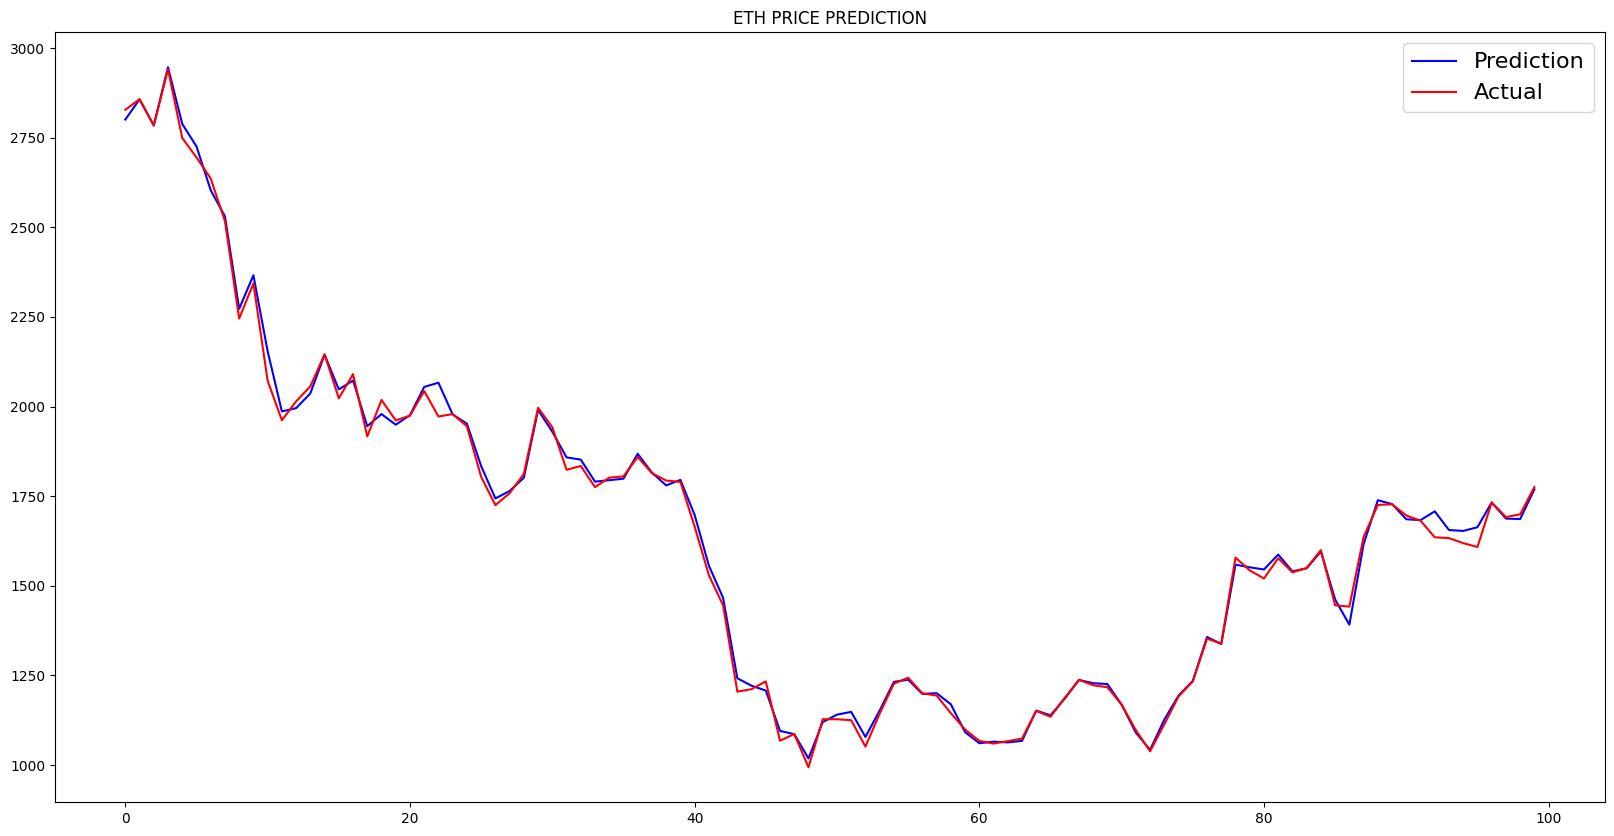

In [33]:
# Plot value in the first 100 days
plt.figure(figsize=(20, 10))
plt.plot(prediction[:100], color='blue', label='Prediction')
plt.plot(y_test_transformed[:100], color='red', label='Actual')
plt.title('ETH PRICE PREDICTION')
plt.legend(loc='best', fontsize=16)
plt.show()


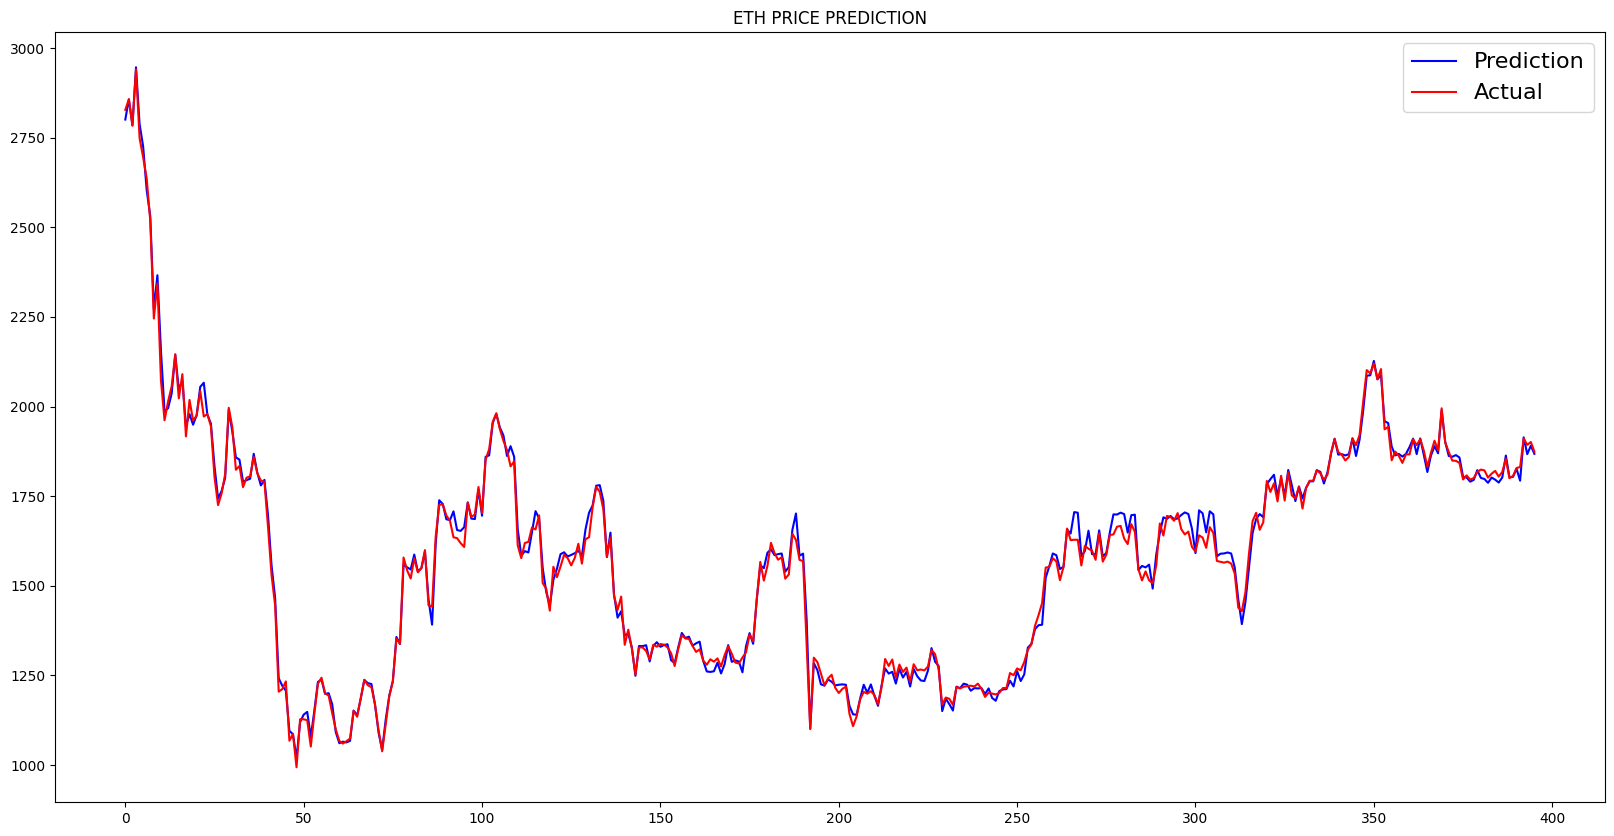

In [34]:
# Plot value full time
plt.figure(figsize=(20, 10))
plt.plot(prediction, color='blue', label='Prediction')
plt.plot(y_test_transformed, color='red', label='Actual')
plt.title('ETH PRICE PREDICTION')
plt.legend(loc='best', fontsize=16)
plt.show()


## Predict future

In [35]:
# Get the data for the previous 30 days
previous_data = eth_data.iloc[-40:-1]


In [36]:

# Separate the features and the target variable (Close price)
X_previous = previous_data.drop('Close', axis=1)
y_previous = previous_data['Close']

In [37]:
# Create DMatrix for the previous data
dprevious = xgb.DMatrix(X_previous.values)

In [38]:
# Use the trained model to predict the next day's price
predicted_price = xgb_model.predict(dprevious)


In [40]:
# Display the predicted ETH prices for the first 10 days
for i in range(35):
    print(f"Day {i+1} - Predicted ETH price: {predicted_price[i]}")


Day 1 - Predicted ETH price: 1863.6893310546875
Day 2 - Predicted ETH price: 1867.792236328125
Day 3 - Predicted ETH price: 1860.25048828125
Day 4 - Predicted ETH price: 1868.0809326171875
Day 5 - Predicted ETH price: 1887.094970703125
Day 6 - Predicted ETH price: 1910.43408203125
Day 7 - Predicted ETH price: 1867.2349853515625
Day 8 - Predicted ETH price: 1911.0162353515625
Day 9 - Predicted ETH price: 1865.163818359375
Day 10 - Predicted ETH price: 1817.3597412109375
Day 11 - Predicted ETH price: 1862.76904296875
Day 12 - Predicted ETH price: 1889.3917236328125
Day 13 - Predicted ETH price: 1869.4854736328125
Day 14 - Predicted ETH price: 1988.9232177734375
Day 15 - Predicted ETH price: 1901.091796875
Day 16 - Predicted ETH price: 1862.026611328125
Day 17 - Predicted ETH price: 1859.9383544921875
Day 18 - Predicted ETH price: 1864.50146484375
Day 19 - Predicted ETH price: 1857.8216552734375
Day 20 - Predicted ETH price: 1804.329833984375
Day 21 - Predicted ETH price: 1802.00561523437

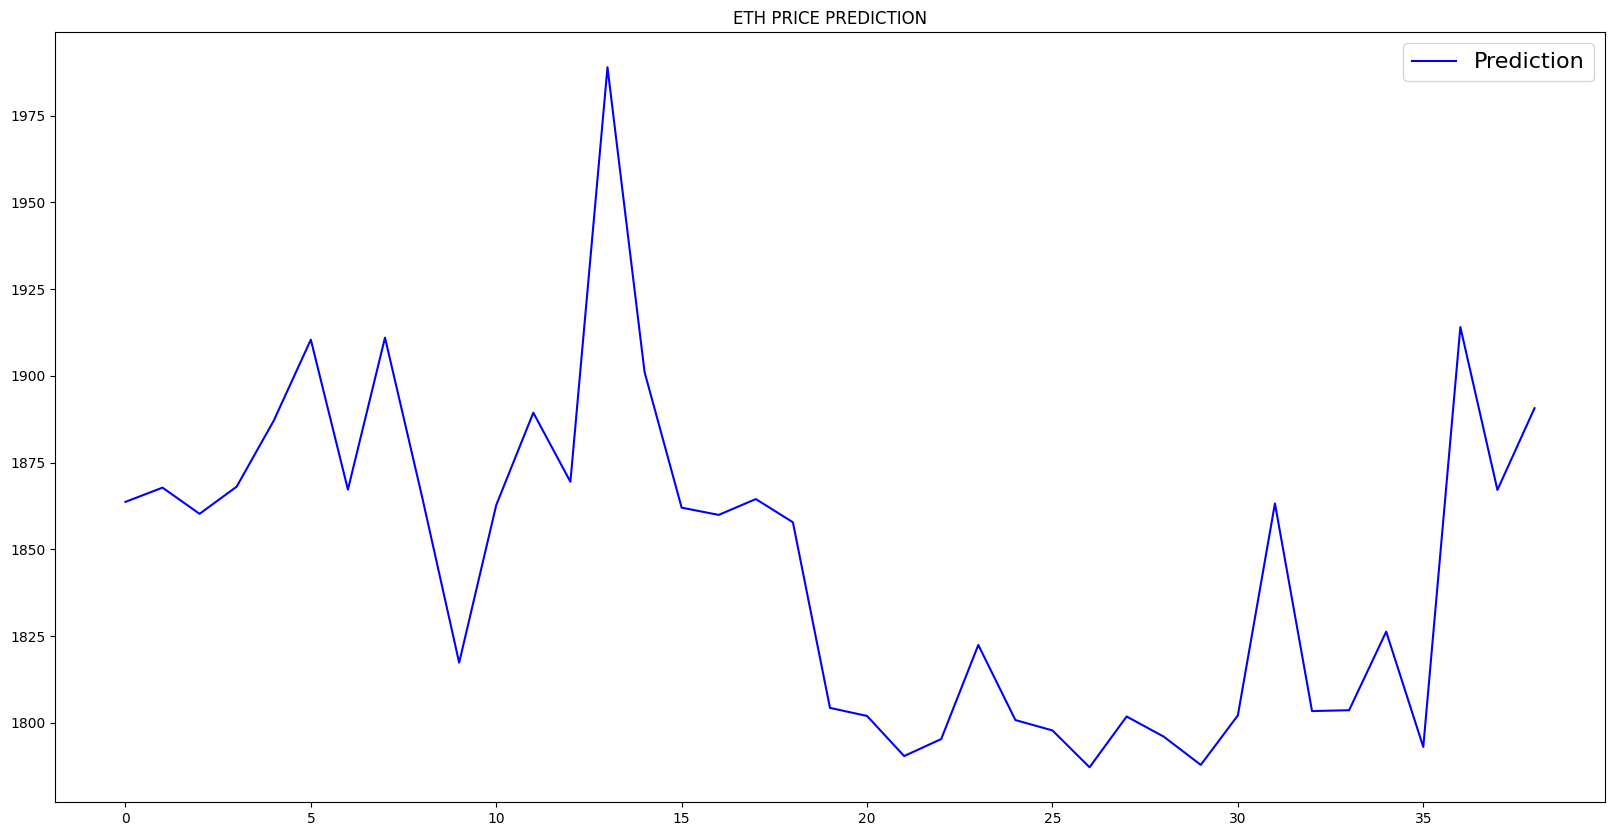

In [41]:
# Plot value in the first 100 days
plt.figure(figsize=(20, 10))
plt.plot(predicted_price, color='blue', label='Prediction')
plt.title('ETH PRICE PREDICTION')
plt.legend(loc='best', fontsize=16)
plt.show()
